#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

#### Loading the dataset

In [3]:
# Load the dataset
df = pd.read_csv(r"C:\Users\LENOVO\DSnML\Employee.csv")


 <span style="color:green; font-weight:bold; font-size:24px"> Data Exploration</span>

 <span style="color:blue; font-weight:bold; font-size:20px">Underdtanding Data</span>

In [5]:
df.sample(10)   # To show random 10 rows in the dataframe

,Company,Age,Salary,Place,Country,Gender
34,Infosys,26.0,8202.0,NaN,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
38,TCS,34.0,2300.0,Calcutta,India,0
107,TCS,0.0,9024.0,Chennai,India,1
130,TCS,21.0,4824.0,Mumbai,India,0
109,NaN,33.0,NaN,Calcutta,India,0
71,TCS,34.0,9024.0,Mumbai,India,1
35,TCS,35.0,9024.0,NaN,India,1
140,Infosys,44.0,4034.0,Hyderabad,India,0
138,CTS,44.0,3033.0,Cochin,India,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [9]:
df.value_counts()

Company                    Age   Salary  Place     Country  Gender
Infosys                    22.0  8787.0  Calcutta  India    1         2
TCS                        21.0  4824.0  Mumbai    India    0         2
CTS                        0.0   1234.0  Calcutta  India    0         1
TCS                        0.0   9024.0  Chennai   India    1         1
                           23.0  4824.0  Calcutta  India    0         1
                                                                     ..
Infosys                    22.0  8202.0  Cochin    India    0         1
                           21.0  3030.0  Calcutta  India    0         1
                           0.0   3234.0  Mumbai    India    0         1
                                 3030.0  Calcutta  India    0         1
Tata Consultancy Services  31.0  8345.0  Mumbai    India    0         1
Name: count, Length: 91, dtype: int64

In [11]:
df.isnull().sum()  # To get the count of null or missing values in each columns


Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [13]:
df.describe()    # To get the descriptive statistics of the data

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [15]:
df.shape

(148, 6)

### Display unique values and their counts

 <span style="color:blue; font-weight:bold; font-size:16px">Method 1:</span>

In [17]:
unique_values = {col: df[col].unique() for col in df.columns}
unique_lengths = {col: len(df[col].unique()) for col in df.columns}

In [19]:
unique_values 
unique_lengths

{'Company': 7, 'Age': 30, 'Salary': 41, 'Place': 12, 'Country': 1, 'Gender': 2}

 <span style="color:blue; font-weight:bold; font-size:15px">Method 2:</span>

In [21]:
unique_vals = {col: df[col].unique() for col in df.columns}

In [23]:
unique_vals

{'Company': array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
        'Congnizant', 'Infosys Pvt Lmt'], dtype=object),
 'Age': array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
        21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
        33., 17.,  0., 54.]),
 'Salary': array([  nan, 2300., 3000., 4000., 5000., 6000., 7000., 8000., 9000.,
        1089., 1234., 3030., 3045., 3184., 4824., 5835., 7084., 8943.,
        8345., 9284., 9876., 2034., 7654., 2934., 4034., 5034., 8202.,
        9024., 4345., 6544., 6543., 3234., 4324., 5435., 5555., 8787.,
        3454., 5654., 5009., 5098., 3033.]),
 'Place': array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
        nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
       dtype=object),
 'Country': array(['India'], dtype=object),
 'Gender': array([0, 1], dtype=int64)}

In [319]:
unique_counts = df.nunique()  # This doesnt consider null values

In [321]:
unique_counts

Company     6
Age        29
Salary     40
Place      11
Country     1
Gender      2
dtype: int64

 <span style="color:blue; font-weight:bold; font-size:20px">Basic Stas and renaming of columns</span>

In [25]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [27]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [194]:
df

,company,age,salary,place,country,gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


 <span style="color:green; font-weight:bold; font-size:24px"> Data Cleaning</span>

 <span style="color:blue; font-weight:bold; font-size:20px">Removing Duplicates</span>

In [29]:
df = df.drop_duplicates()

In [31]:
df.shape    # 4 rows removed

(144, 6)

In [33]:
df.head(10)

,company,age,salary,place,country,gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
5,Infosys,NaN,5000.0,Calcutta,India,0
6,TCS,NaN,6000.0,Chennai,India,1
7,Infosys,23.0,7000.0,Mumbai,India,1
8,TCS,34.0,8000.0,Calcutta,India,1
9,CTS,45.0,9000.0,Delhi,India,0


 <span style="color:blue; font-weight:bold; font-size:20px">Replacing NaN in age column with 0</span>

In [35]:
df['age'].replace(np.nan, 0, inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12832\2214740834.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].replace(np.nan, 0, inplace=True)


In [37]:
df.head(10)

,company,age,salary,place,country,gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
5,Infosys,0.0,5000.0,Calcutta,India,0
6,TCS,0.0,6000.0,Chennai,India,1
7,Infosys,23.0,7000.0,Mumbai,India,1
8,TCS,34.0,8000.0,Calcutta,India,1
9,CTS,45.0,9000.0,Delhi,India,0


In [39]:
df.isna().sum()

company     8
age         0
salary     23
place      14
country     0
gender      0
dtype: int64

<span style="color:blue; font-weight:bold; font-size:20px"> Filling Missing Values</span>

In [41]:
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)             # filling missing values in numerical columns with median
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)            # filling missing values in non-numerical columns with mode

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12832\1652359969.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)            # filling missing values in non-numerical columns with mode
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12832\1652359969.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the

In [43]:
df.isna().sum()

company    0
age        0
salary     0
place      0
country    0
gender     0
dtype: int64

<span style="color:blue; font-weight:bold; font-size:20px">Finding Outliers using IQR</span>

In [45]:
outliers = {}
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers[col] = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]

 <span style="color:green; font-weight:bold; font-size:24px"> 3. Data Analysis</span>

 <span style="color:blue; font-weight:bold; font-size:20px">Filter: age > 40 and salary < 5000</span>

In [47]:
filtered_df = df[(df['age'] > 40) & (df['salary'] < 5000)]
filtered_df.head(10)

,company,age,salary,place,country,gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


 <span style="color:blue; font-weight:bold; font-size:20px">Plot age vs salary</span>

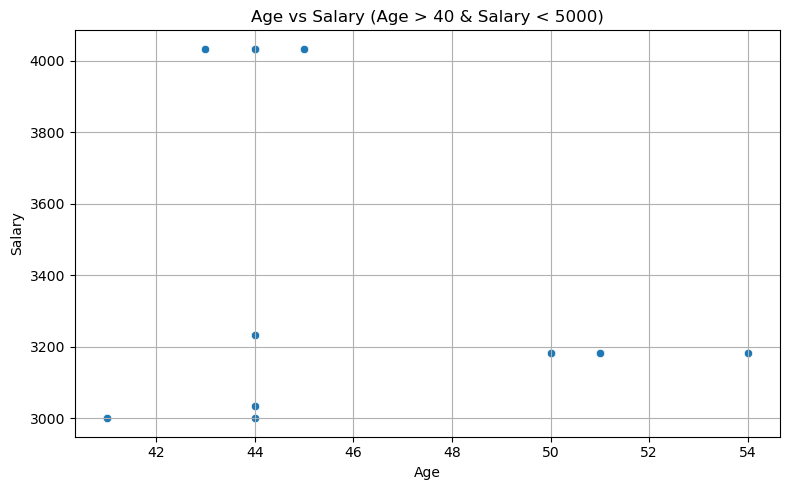

In [49]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=filtered_df, x='age', y='salary')
plt.title("Age vs Salary (Age > 40 & Salary < 5000)")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid(True)
plt.tight_layout()
plt.show()

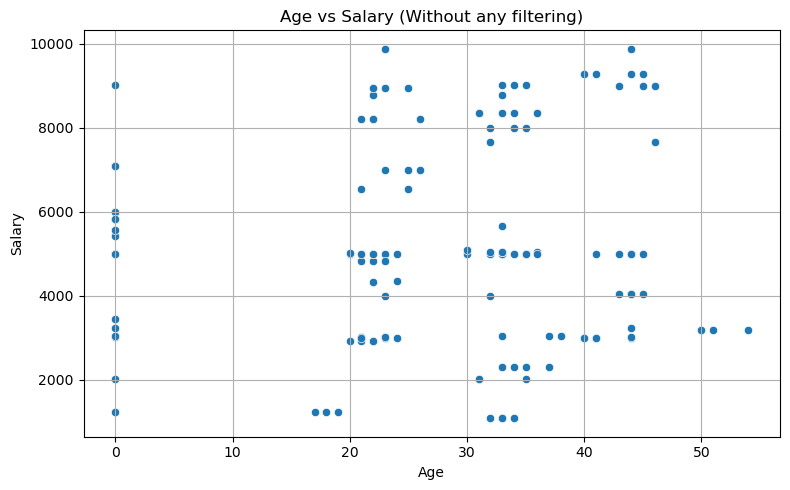

In [51]:
plt.figure(figsize=(8, 5))
sns.scatterplot(df, x='age', y='salary')
plt.title("Age vs Salary (Without any filtering)")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid(True)
plt.tight_layout()
plt.show()

 <span style="color:blue; font-weight:bold; font-size:20px">People count from each place</span>

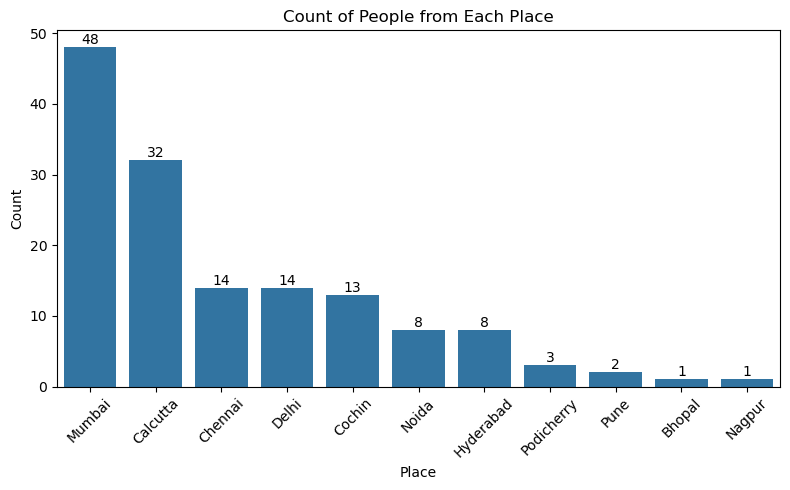

In [53]:
place_counts = df['place'].value_counts()
plt.figure(figsize=(8, 5))
pc=sns.barplot(x=place_counts.index, y=place_counts.values)
pc.bar_label(pc.containers[0])
plt.title("Count of People from Each Place")
plt.xlabel("Place")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 <span style="color:green; font-weight:bold; font-size:24px">4. Data Encoding</span>

 <span style="color:blue; font-weight:bold; font-size:20px">Label encoding the place column</span>

In [55]:
label_enc = LabelEncoder()
df["place"] = label_enc.fit_transform(df["place"])

In [57]:
df.head(10)

,company,age,salary,place,country,gender
0,TCS,20.0,5000.0,2,India,0
1,Infosys,30.0,5000.0,6,India,0
2,TCS,35.0,2300.0,1,India,0
3,Infosys,40.0,3000.0,4,India,0
4,TCS,23.0,4000.0,6,India,0
5,Infosys,0.0,5000.0,1,India,0
6,TCS,0.0,6000.0,2,India,1
7,Infosys,23.0,7000.0,6,India,1
8,TCS,34.0,8000.0,1,India,1
9,CTS,45.0,9000.0,4,India,0


 <span style="color:blue; font-weight:bold; font-size:20px">One Hot Encoding the gender column</span>

In [59]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [61]:
encoder = OneHotEncoder()
encoded_gender = encoder.fit_transform(df[['gender']]).toarray()
encoded_gender_df = pd.DataFrame(encoded_gender, columns=encoder.get_feature_names_out(['gender']))
one_hot_encoded_df = pd.concat([df, encoded_gender_df], axis=1).drop('gender', axis=1)

one_hot_encoded_df.head(10)


,company,age,salary,place,country,gender_0,gender_1
0,TCS,20.0,5000.0,2.0,India,1.0,0.0
1,Infosys,30.0,5000.0,6.0,India,1.0,0.0
2,TCS,35.0,2300.0,1.0,India,1.0,0.0
3,Infosys,40.0,3000.0,4.0,India,1.0,0.0
4,TCS,23.0,4000.0,6.0,India,1.0,0.0
5,Infosys,0.0,5000.0,1.0,India,1.0,0.0
6,TCS,0.0,6000.0,2.0,India,0.0,1.0
7,Infosys,23.0,7000.0,6.0,India,0.0,1.0
8,TCS,34.0,8000.0,1.0,India,0.0,1.0
9,CTS,45.0,9000.0,4.0,India,1.0,0.0


In [63]:
encoded_cols = pd.get_dummies(df['gender'], prefix='gender').astype(int)
df = pd.concat([df, encoded_cols], axis=1)
df.drop('gender', axis=1, inplace=True)


In [309]:
df.head(10)

,company,age,salary,place,country,gender_0,gender_1,gender_0,gender_1,gender_0,gender_1,gender_0,gender_1
0,TCS,20.0,5000.0,2,India,True,False,1,0,1,0,1,0
1,Infosys,30.0,5000.0,6,India,True,False,1,0,1,0,1,0
2,TCS,35.0,2300.0,1,India,True,False,1,0,1,0,1,0
3,Infosys,40.0,3000.0,4,India,True,False,1,0,1,0,1,0
4,TCS,23.0,4000.0,6,India,True,False,1,0,1,0,1,0
5,Infosys,0.0,5000.0,1,India,True,False,1,0,1,0,1,0
6,TCS,0.0,6000.0,2,India,False,True,0,1,0,1,0,1
7,Infosys,23.0,7000.0,6,India,False,True,0,1,0,1,0,1
8,TCS,34.0,8000.0,1,India,False,True,0,1,0,1,0,1
9,CTS,45.0,9000.0,4,India,True,False,1,0,1,0,1,0


 <span style="color:green; font-weight:bold; font-size:24px">5. Feature Scaling</span>

In [67]:

# Select only numeric columns for scaling
numeric_df = df.select_dtypes(include=np.number)

# StandardScaler
scaler_standard = StandardScaler()
scaled_std = pd.DataFrame(scaler_standard.fit_transform(numeric_df), columns=numeric_df.columns)

# MinMaxScaler
scaler_minmax = MinMaxScaler()
scaled_minmax = pd.DataFrame(scaler_minmax.fit_transform(numeric_df), columns=numeric_df.columns)

print("\nScaled (StandardScaler):")
print(scaled_std.head())

print("\nScaled (MinMaxScaler):")
print(scaled_minmax.head())


Scaled (StandardScaler):
        age    salary     place  gender_0  gender_1
0 -0.483417 -0.100827 -0.893255  0.534522 -0.534522
1  0.214798 -0.100827  0.750562  0.534522 -0.534522
2  0.563906 -1.243735 -1.304209  0.534522 -0.534522
3  0.913014 -0.947426 -0.071346  0.534522 -0.534522
4 -0.273953 -0.524127  0.750562  0.534522 -0.534522

Scaled (MinMaxScaler):
        age    salary  place  gender_0  gender_1
0  0.370370  0.445089    0.2       1.0       0.0
1  0.555556  0.445089    0.6       1.0       0.0
2  0.648148  0.137817    0.1       1.0       0.0
3  0.740741  0.217480    0.4       1.0       0.0
4  0.425926  0.331285    0.6       1.0       0.0
